<a href="https://colab.research.google.com/github/nallagondu/DATASCIENCE-practice/blob/main/Data_Preprocessing_importent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install -q requests xlrd
import pandas as pd
import requests


In [ ]:
url = "https://raw.githubusercontent.com/nallagondu/DATASCIENCE-practice/main/sales%20data.xlsx"
response = requests.get(url)

# Save the response content to a file
with open("sales_data.xlsx", "wb") as file:
    file.write(response.content)

# Read the Excel file into a DataFrame
df = pd.read_excel("sales_data.xlsx")

# Display the first few rows of the DataFrame
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.drop_duplicates()

In [ ]:
missing_values = df.isnull().sum()
missing_values

In [ ]:

from sklearn.impute import SimpleImputer


In [ ]:
target_column = 'order_value_EUR'
imputer = SimpleImputer(strategy='median')
df[target_column] = imputer.fit_transform(df[[target_column]])

In [ ]:
df.isnull().sum()

In [ ]:
target_column1 = 'device_type'
imputer = SimpleImputer(strategy='most_frequent')
df[target_column1] = imputer.fit_transform(df[[target_column1]])

In [ ]:
df.isnull().sum()

In [ ]:
df.drop_duplicates()

In [ ]:
df.isnull().sum()


In [ ]:
df.describe()

In [ ]:
#Simple variable containes mixed data
mixed_data = df['cost']
#create a empty list to copy non-numarical data
non_numaric_values = []

for value in mixed_data:
  if isinstance(value,str) and not  value.isnumeric():
    non_numaric_values.append(value)

print("Non-Numaric values:")
print(non_numaric_values)


In [ ]:
mask = (df['cost'] == 'XXX')

#remove rows that match the mask
df = df[~mask]

In [ ]:
df['cost'] = df['cost'].astype(float)
df.dtypes

In [ ]:
df['date'] = df['date'].astype('datetime64')
df.dtypes

In [ ]:
df.head()

In [ ]:
#to remove duplicates
duplicates = df[df.duplicated()]
duplicates

In [ ]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

In [ ]:
cleaned_data = df_no_duplicates
cleaned_data.head()

In [ ]:
cleaned_data.describe()

In [ ]:
cleaned_data.dtypes

In [ ]:
#sort the data based on cost
df_sorted_cost = df.sort_values(by='cost', ascending = True)
df_sorted_cost

In [ ]:
##sort the data based on country

df_sorted_country = df.sort_values(by='country', ascending = True)
df_sorted_country

In [ ]:
##sort the data based on data
df_sorted_date = df.sort_values(by='date', ascending = True)
df_sorted_date

In [ ]:
url = "https://raw.githubusercontent.com/nallagondu/DATASCIENCE-practice/main/Extra Variable.xlsx"
response = requests.get(url)

# Save the response content to a file
with open("Extra Variable.xlsx", "wb") as file:
    file.write(response.content)

# Read the Excel file into a DataFrame
df = pd.read_excel("Extra Variable.xlsx")

# Display the first few rows of the DataFrame
df.head()

In [ ]:
# Merge data set Extra Variable.xlsx and "sales_data.xlsx
merged_df = df_sorted_date.merge(df, on='order_id')
merged_df

In [ ]:
#To add extra data in previous Dataframe
url = "https://raw.githubusercontent.com/nallagondu/DATASCIENCE-practice/main/Extra Data.xlsx"
response = requests.get(url)

# Save the response content to a file
with open("Extra Data.xlsx", "wb") as file:
    file.write(response.content)

# Read the Excel file into a DataFrame
extra_df = pd.read_excel("Extra Data.xlsx")

# Display the first few rows of the DataFrame
extra_df.head()


In [ ]:
concatenated_df = pd.concat([merged_df, extra_df], ignore_index=True)

In [ ]:
concatenated_df

In [ ]:
# now we will learn about how to filter the Data Frame to include only rows where country is France
filtered_df_france = concatenated_df[concatenated_df['country'] == 'France']

filtered_df_france

In [ ]:
# now we will learn about how to filter the Data Frame including with two or more data field ,
# include  rows where country is France and Category is games
filtered_df_france_final = concatenated_df[(concatenated_df['country'] == 'France') & (concatenated_df['category'] == 'Games' )]

filtered_df_france_final

In [ ]:
#create a pivot table to calculate mediam sales and cost, and purchase frequntly
pivot_table = concatenated_df.pivot_table(index = 'customer_name',
                                               values=['order_value_EUR', 'cost'],
                                               aggfunc={'order_value_EUR': 'median', 'cost': 'median', 'customer_name': 'count'})
#rename columns for clarity
pivot_table.columns = ['Median Cost', 'Purchase Frequency', 'Median sales']

pivot_table.columns


In [ ]:
pivot_table

In [ ]:
sorted_pivot_table = pivot_table.sort_values(by = 'Purchase Frequency', ascending=False)
top10 = sorted_pivot_table[0:10]
top10

In [ ]:
top10.index

In [ ]:
loyal_customers_names = ['Johns and Sons', 'Hessel-Stiedemann',
       'Swaniawski, Runolfsson and Green', 'Dickinson, Hyatt and Berge',
       'Murray, Reichel and Nolan', 'Rowe, Hermiston and Kessler',
       'Larkin-Collier', 'Kihn Inc', 'Wisoky Inc', 'Tillman and Sons']
#function to assign loyal customers or regular customers
def customer_type(name):
  if name in loyal_customers_names:
      return "Loyal Customer"
  else:
      return "regular customer"


concatenated_df['CustomerType'] =  concatenated_df['customer_name'].apply(customer_type)

In [ ]:
concatenated_df

In [ ]:
 concatenated_df['CustomerType'].value_counts()

In [ ]:
#convert the Date column in to a date time type
concatenated_df['date'] = pd.to_datetime(concatenated_df['date'])

#Extract day ,month, and year into new column
concatenated_df['Day'] = concatenated_df['date'].dt.day
concatenated_df['Month'] = concatenated_df['date'].dt.month
concatenated_df['Year'] = concatenated_df['date'].dt.year

In [ ]:
concatenated_df.head()

In [ ]:
concatenated_df

In [ ]:
concatenated_df['Year'].value_counts()

**Assigning Numarical Variable**

customer type encoded (1,0)

In [ ]:
concatenated_df['CustomerType_encoded'] = concatenated_df['CustomerType'].replace({'Loyal Customer': 1,'regular customer': 0})

In [ ]:
concatenated_df

In [ ]:
#Create Dummy variable for categorical columns
dummy_df = pd.get_dummies(concatenated_df, columns = ['country', 'category','device_type'])

In [ ]:
dummy_df.head()

In [ ]:
#dependent varialbe y =
y = dummy_df['refund']
dummy_df.columns

In [ ]:
#list of categorical variables to drop
variables_to_drop = ['date', 'customer_name','sales_manager','sales_rep', 'order_id','refund', 'CustomerType' ]

#Drop the specified Columns
x = dummy_df.drop(variables_to_drop, axis=1)

In [ ]:
x.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Initialize the standard scaler
scaler = StandardScaler()

#scale the numeric columns
scaled_data = scaler.fit_transform(x)

In [ ]:
scaled_data

**Train Machine learning model **

In [ ]:
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(scaled_data, y,test_size=.3, random_state=234)

In [ ]:
#https://delldigital.udemy.com/course/fast-track-machine-learning-in-python-chatgpt/learn/lecture/40487000#overview
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
#Initialize the Linear regression model
model = LinearRegression()
#Train fit the model on the training data
model.fit(train_x,train_y)

#make predictions on the test data
y_pred = model.predict(test_x)

In [ ]:
#Calculate MAPE
def calculate_mape(test_y, y_pred):
  return np.mean(np.abs((test_y - y_pred) / test_y)) ** 100
mape = calculate_mape(test_y, y_pred)

In [ ]:
#visualize y_pred against test_y
plt.scatter(y_pred, test_y, color = 'blue')

plt.xlabel('Preediction')
plt.ylabel('Actual')
plt.title('Linear regression prediction vs Actual Data')
plt.show()

In [ ]:
#Create a KDE plot to visualize the distribution of residuals
import seaborn as sns
residuals = test_y - y_pred
sns.kdeplot(residuals, shade=True)

plt.xlabel('residuals')
plt.ylabel('Density')
plt.title('residuals Distribution(KDE Plot))')
plt.show()

In [ ]:
#Print MAPE
print(f"Mean absolute percentage error (MAPE): {mape:.2f}%")

** DecisionTreeRegressor**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Building the DecisionTreeRegressor model
model_decTree = DecisionTreeRegressor(random_state=42)
model_decTree.fit(train_x, train_y)

# Making predictions on the test data
y_pred_decTree = model_decTree.predict(test_x)

In [ ]:

mape_decTree = calculate_mape(test_y, y_pred_decTree)

In [ ]:
#visualize y_pred against test_y
plt.scatter(y_pred_decTree, test_y, color = 'blue')

plt.xlabel('Preediction')
plt.ylabel('Actual')
plt.title('Descision tree regression Prediction  vs Actual Data')
plt.show()

In [ ]:
#Create a KDE plot to visualize the distribution of residuals

residuals = test_y - y_pred_decTree
sns.kdeplot(residuals, shade=True)

plt.xlabel('residuals')
plt.ylabel('Density')
plt.title('residuals Distribution(KDE Plot))')
plt.show()

In [ ]:
#Print MAPE
print(f"Mean absolute percentage error (MAPE): {mape_decTree:.2f}%")


**RandomForestRegressor** model



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#Initialize the model
model_rfreg = RandomForestRegressor()
#train (fir) the model on the training data
model_rfreg.fit(train_x, train_y)

# Making predictions on the test data
y_pred_rfreg = model_rfreg.predict(test_x)

# Calculating Mean Absolute Percentage Error (MAPE)
mape_rfreg = calculate_mape(test_y, y_pred_rfreg)

In [ ]:
#visualize y_pred against test_y
plt.scatter(y_pred_rfreg, test_y, color = 'red')

plt.xlabel('Preediction')
plt.ylabel('Actual')
plt.title('Random Forest  regression Prediction  vs Actual Data')
plt.grid(True)
plt.show()

In [ ]:
#Create a KDE plot to visualize the distribution of residuals

residuals = test_y - y_pred_rfreg
sns.kdeplot(residuals, shade=True)

plt.xlabel('residuals')
plt.ylabel('Density')
plt.title('Residuals Distribution(KDE Plot))')
plt.grid(True)
plt.show()

In [ ]:
#Print MAPE
print(f"Mean absolute percentage error (MAPE): {mape_rfreg:.2f}%")

**Supprt Vector regression Model**[link text](https://)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_svr = SVR()
model_svr.fit(train_x, train_y)
# Making predictions on the test data
y_pred_svr = model_svr.predict(test_x)

# Calculating Mean Absolute Percentage Error (MAPE)
mape_svr = calculate_mape(test_y, y_pred_svr)


In [ ]:
# Visualizing y_pred against test_y
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_svr,test_y,color= 'green', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Support vector regressor  vs Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
#Create a KDE plot to visualize the distribution of residuals

residuals = test_y - y_pred_svr
sns.kdeplot(residuals, shade=True)

plt.xlabel('residuals')
plt.ylabel('Density')
plt.title('Residuals Distribution(KDE Plot))')
plt.grid(True)
plt.show()

In [ ]:
#Print MAPE
print(f"Mean absolute percentage error (MAPE): {mape_svr:.2f}%")

**this is very poor model to predict the refund amount .**: to select best model based on above models and SVR is very poor to predect refund amount

**#SGBOOST Model**

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
model_HGboostR = HistGradientBoostingRegressor()
model_HGboostR.fit(train_x, train_y)

# Making predictions on the test data
y_pred_HGboostR = model_HGboostR.predict(test_x)

# Calculating Mean Absolute Percentage Error (MAPE)
mape_HGboostR = calculate_mape(test_y, y_pred_HGboostR)

In [ ]:
# Visualizing y_pred against test_y
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_HGboostR,test_y,color= 'orange', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('HGboostR vector regressor  vs Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
#Create a KDE plot to visualize the distribution of residuals

residuals = test_y - y_pred_HGboostR
sns.kdeplot(residuals, shade=True)

plt.xlabel('residuals')
plt.ylabel('Density')
plt.title('y_pred_HGboostR Distribution(KDE Plot))')
plt.grid(True)
plt.show()

In [ ]:
#Print MAPE
print(f"Mean absolute percentage error (MAPE): {mape_HGboostR:.2f}%")

The **Mean Absolute Percentage Error (MAPE)** is a commonly used metric for evaluating the accuracy of forecasts or predictions, particularly in time series analysis and regression problems. It measures the average percentage difference between the predicted values and the actual values. MAPE is expressed as a percentage, and lower values indicate better accuracy.

Here's the formula for calculating MAPE:

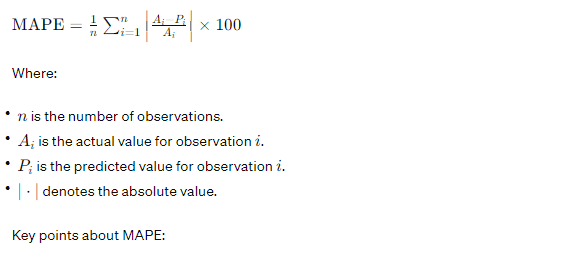


Interpretation: MAPE indicates the average percentage difference between the predicted and actual values. For example, a MAPE of 5% means that, on average, the predictions are off by 5% from the actual values.

Scale Independence: MAPE is scale-independent, meaning it can be used to compare the accuracy of models across different datasets and units of measurement.

Sensitivity to Zero Values: MAPE is sensitive to zero values in the actual data. If any
Ai
  value is zero, the MAPE calculation will result in undefined values. To address this, you can add a small constant (e.g., 0.0001) to both the actual and predicted values.

Robustness: MAPE is robust to outliers because it calculates the percentage difference, rather than the absolute difference, between predicted and actual values.

Limitations: MAPE has some limitations, particularly when the actual values are close to zero. In such cases, small absolute errors can lead to disproportionately large percentage errors.

Usage: MAPE is commonly used in business forecasting, demand planning, inventory management, and other areas where accurate predictions are essential.

next chapter :  Logistic Regression  ML Model